In [ ]:
# Import libraries
import random
import numpy as np
import cv2
import matplotlib.pyplot as plt

1080
1440
(648, 1728, 3)
(648, 864)
(648, 864)
(648, 864)
(648, 864)
(648, 864)
(648, 864)
(648, 864)
(648, 864)
(648, 864)


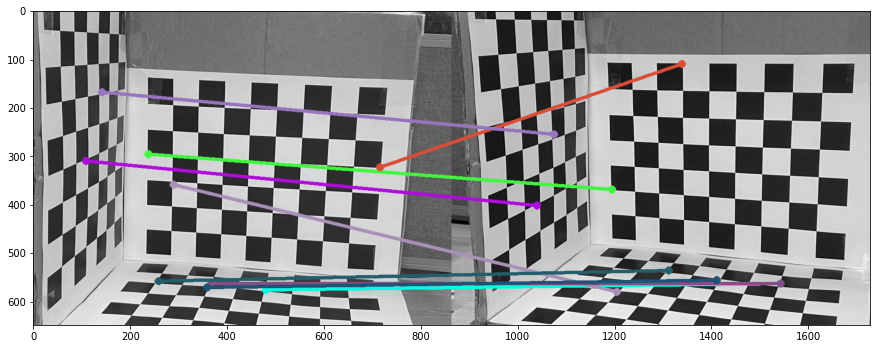

In [ ]:
img1 = cv2.imread('1.JPG', 0)
img2 = cv2.imread('2.JPG', 0)
# Resize the image
resized_ratio = 1

img1_h, img1_w = img1.shape
img2_h, img2_w = img2.shape
print(img1_h)
print(img1_w)
img1 = cv2.resize(img1, (int(img1_w * resized_ratio), int(img1_h * resized_ratio)), interpolation = cv2.INTER_AREA)
img2 = cv2.resize(img2, (int(img2_w * resized_ratio), int(img2_h * resized_ratio)), interpolation = cv2.INTER_AREA)

# Initiate ORB detector
orb = cv2.ORB_create()
# Find the keypoints and descriptor with ORB
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# matcher takes normType, which is set to cv2.NORM_L2 for SIFT and SURF, cv2.NORM_HAMMING for ORB, FAST and BRIEF
# create BF matcher 
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)
# draw first 50 matches
# match_img = cv2.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)
# cv2.imwrite("result1.jpg", match_img)


if len(img1.shape) == 3:
    new_shape = (max(img1.shape[0], img2.shape[0]), img1.shape[1]+img2.shape[1], img1.shape[2])
elif len(img1.shape) == 2:
    new_shape = (max(img1.shape[0], img2.shape[0]), img1.shape[1]+img2.shape[1])
new_img = np.zeros(new_shape, type(img1.flat[0]))  
# Place images onto the new image.
new_img[0:img1.shape[0],0:img1.shape[1]] = img1
new_img[0:img2.shape[0],img1.shape[1]:img1.shape[1]+img2.shape[1]] = img2
# Convert output from gray to RGB
new_img = cv2.cvtColor(new_img,cv2.COLOR_GRAY2RGB)
# Debug 2021 Jan 6
print(new_img.shape)

# Draw lines between matches.  Make sure to offset kp coords in second image appropriately.
r = 5
thickness = 5
point_to_disp = 10
for m in matches[:point_to_disp]:
    # Generate random color for RGB/BGR and grayscale images as needed.
    c = tuple(np.random.randint(256, size=3))
    c = (int(c[0]), int(c[1]), int(c[2])) 
    print(img1.shape)
    # So the keypoint locs are stored as a tuple of floats.  cv2.line(), like most other things,
    # wants locs as a tuple of ints.
    end1 = tuple(np.round(kp1[m.queryIdx].pt).astype(int))
    end2 = tuple(np.round(kp2[m.trainIdx].pt).astype(int) + np.array([img1.shape[1], 0]))
    cv2.line(new_img, end1, end2, c, thickness)
    cv2.circle(new_img, end1, r, c, thickness)
    cv2.circle(new_img, end2, r, c, thickness)
cv2.imwrite("result.jpg", new_img)
plt.figure(figsize=(15,15))
plt.imshow(new_img)
plt.show()



In [ ]:
from google.colab import files
files.download('result.jpg') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>